In [1]:
import pypsa
import numpy as np
import random
import matplotlib.pyplot as plt, mpld3
random.seed(69)
network = pypsa.Network()

In [2]:
#Add 8 buses
for i in range(8):
    network.add("Bus","Bus {}".format(i))
network.buses.at[network.buses.index[0], 'x'] = 0
network.buses.at[network.buses.index[0], 'y'] = 5

network.buses.at[network.buses.index[1], 'x'] = 6
network.buses.at[network.buses.index[1], 'y'] = 5

network.buses.at[network.buses.index[2], 'x'] = 9
network.buses.at[network.buses.index[2], 'y'] = 5

network.buses.at[network.buses.index[3], 'x'] = 3
network.buses.at[network.buses.index[3], 'y'] = 2

network.buses.at[network.buses.index[4], 'x'] = 0
network.buses.at[network.buses.index[4], 'y'] = 0

network.buses.at[network.buses.index[5], 'x'] = 3
network.buses.at[network.buses.index[5], 'y'] = 0

network.buses.at[network.buses.index[6], 'x'] = 6
network.buses.at[network.buses.index[6], 'y'] = 0

network.buses.at[network.buses.index[7], 'x'] = 9
network.buses.at[network.buses.index[7], 'y'] = 0

In [3]:
edges = [(0,1),(0,3),(0,4),(0,5),(1,3),(1,7),(1,2),(2,6),(2,7),(3,4),(3,5),(3,6),(5,6),(6,7)]

In [4]:
#add three lines in a ring
for i in range(len(edges)):
    network.add("Line","Linine {}".format(i),
                bus0="Bus {}".format(edges[i][0]),
                bus1="Bus {}".format(edges[i][1]),
                x=0.0001,
                s_nom=60)
print(network.lines)



attribute   bus0   bus1 type       x    r    g    b  s_nom  s_nom_extendable  \
Line                                                                           
Linine 0   Bus 0  Bus 1       0.0001  0.0  0.0  0.0   60.0             False   
Linine 1   Bus 0  Bus 3       0.0001  0.0  0.0  0.0   60.0             False   
Linine 2   Bus 0  Bus 4       0.0001  0.0  0.0  0.0   60.0             False   
Linine 3   Bus 0  Bus 5       0.0001  0.0  0.0  0.0   60.0             False   
Linine 4   Bus 1  Bus 3       0.0001  0.0  0.0  0.0   60.0             False   
Linine 5   Bus 1  Bus 7       0.0001  0.0  0.0  0.0   60.0             False   
Linine 6   Bus 1  Bus 2       0.0001  0.0  0.0  0.0   60.0             False   
Linine 7   Bus 2  Bus 6       0.0001  0.0  0.0  0.0   60.0             False   
Linine 8   Bus 2  Bus 7       0.0001  0.0  0.0  0.0   60.0             False   
Linine 9   Bus 3  Bus 4       0.0001  0.0  0.0  0.0   60.0             False   
Linine 10  Bus 3  Bus 5       0.0001  0.

In [5]:
#add a generator at bus 2
network.add("Generator","Gen 2",
            bus="Bus 2",
            p_nom=300,
            marginal_cost=random.randint(25,75))
#add a generator at bus 3
network.add("Generator","Gen 3",
            bus="Bus 3",
            p_nom=300,
            marginal_cost=random.randint(25,75))
#add a generator at bus 4
network.add("Generator","Gen 4",
            bus="Bus 4",
            p_nom=300,
            marginal_cost=random.randint(25,75))



In [6]:
#add loads
for i in [0,1,5,6,7]:
    network.add("Load",f"Load {i}",
                bus=f"Bus {i}",
                p_set=random.randint(25,125))


print(network.loads)

print(network.loads.p_set)

attribute    bus carrier type  p_set  q_set  sign
Load                                             
Load 0     Bus 0                46.0    0.0  -1.0
Load 1     Bus 1                33.0    0.0  -1.0
Load 5     Bus 5               102.0    0.0  -1.0
Load 6     Bus 6                69.0    0.0  -1.0
Load 7     Bus 7                66.0    0.0  -1.0
Load
Load 0     46.0
Load 1     33.0
Load 5    102.0
Load 6     69.0
Load 7     66.0
Name: p_set, dtype: float64


In [7]:
#Do a linear OPF

def my_f(network,snapshots):
    print(snapshots)


network.lopf(extra_functionality=my_f,pyomo=False,solver_name='gurobi')

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.09s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Index(['now'], dtype='object', name='snapshot')
Restricted license - for non-production use only - expires 2023-10-25
Read LP format model from file C:\Users\edwar\AppData\Local\Temp\pypsa-problem-f4pqtl66.lp
Reading time = 0.01 seconds
obj: 49 rows, 18 columns, 88 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 49 rows, 18 columns and 88 nonzeros
Model fingerprint: 0x1cc50e22
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 3e+02]
Presolve removed 34 rows and 1 columns
Presolve time: 0.00s
Presolved: 15 rows, 17 columns, 54 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.183577e+03   0.000000e+00      0s
      10    1.2349333e+04   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 w

INFO:pypsa.linopf:Optimization successful. Objective value: 1.23e+04


('ok', 'optimal')

In [8]:
#Cheap generator 1 cannot be fully dispatched because of network constraints,
#so expensive generator 0 also has to dispatch
network.generators_t.p

Generator,Gen 2,Gen 3,Gen 4
snapshot,,,
now,84.0,138.666667,93.333333


In [9]:
#network flows
(network.lines_t.p0)

Line,Linine 0,Linine 1,Linine 2,Linine 3,Linine 4,Linine 5,Linine 6,Linine 7,Linine 8,Linine 9,Linine 10,Linine 11,Linine 12,Linine 13
snapshot,,,,,,,,,,,,,,
now,7.333333,-26.666667,-60.0,33.333333,-34.0,22.916667,-14.583333,31.916667,37.5,-33.333333,60.0,51.333333,-8.666667,5.583333


In [10]:
#Line 1 is congested
abs(network.lines_t.p0)/network.lines.s_nom

Line,Linine 0,Linine 1,Linine 2,Linine 3,Linine 4,Linine 5,Linine 6,Linine 7,Linine 8,Linine 9,Linine 10,Linine 11,Linine 12,Linine 13
snapshot,,,,,,,,,,,,,,
now,0.122222,0.444444,1.0,0.555556,0.566667,0.381944,0.243056,0.531944,0.625,0.555556,1.0,0.855556,0.144444,0.093056


In [11]:
#Power flows towards lower voltage angles
(network.buses_t.p)

Bus,Bus 0,Bus 1,Bus 2,Bus 3,Bus 4,Bus 5,Bus 6,Bus 7
snapshot,,,,,,,,
now,-46.0,-33.0,84.0,138.666667,93.333333,-102.0,-69.0,-66.0


In [12]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
Linine 0,Bus 0,Bus 1,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 1,Bus 0,Bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 2,Bus 0,Bus 4,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 3,Bus 0,Bus 5,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 4,Bus 1,Bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 5,Bus 1,Bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 6,Bus 1,Bus 2,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 7,Bus 2,Bus 6,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 8,Bus 2,Bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0


In [13]:
network.lopf(extra_functionality=my_f,pyomo=False,solver_name='gurobi')

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.08s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Index(['now'], dtype='object', name='snapshot')
Read LP format model from file C:\Users\edwar\AppData\Local\Temp\pypsa-problem-4ka0gqm6.lp
Reading time = 0.00 seconds
obj: 49 rows, 18 columns, 88 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 49 rows, 18 columns and 88 nonzeros
Model fingerprint: 0x1cc50e22
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 3e+02]
Presolve removed 34 rows and 1 columns
Presolve time: 0.00s
Presolved: 15 rows, 17 columns, 54 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.183577e+03   0.000000e+00      0s
      10    1.2349333e+04   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.234933333e+04


INFO:pypsa.linopf:Optimization successful. Objective value: 1.23e+04


('ok', 'optimal')

In [14]:
#Cheap generator 1 cannot be fully dispatched because of network constraints,
#so expensive generator 0 also has to dispatch
network.generators_t.p

Generator,Gen 2,Gen 3,Gen 4
snapshot,,,
now,84.0,138.666667,93.333333


In [15]:
#network flows
(network.lines_t.p0)

Line,Linine 0,Linine 1,Linine 2,Linine 3,Linine 4,Linine 5,Linine 6,Linine 7,Linine 8,Linine 9,Linine 10,Linine 11,Linine 12,Linine 13
snapshot,,,,,,,,,,,,,,
now,7.333333,-26.666667,-60.0,33.333333,-34.0,22.916667,-14.583333,31.916667,37.5,-33.333333,60.0,51.333333,-8.666667,5.583333


In [16]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
Linine 0,Bus 0,Bus 1,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 1,Bus 0,Bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 2,Bus 0,Bus 4,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 3,Bus 0,Bus 5,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 4,Bus 1,Bus 3,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 5,Bus 1,Bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 6,Bus 1,Bus 2,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 7,Bus 2,Bus 6,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0
Linine 8,Bus 2,Bus 7,,0.0001,0.0,0.0,0.0,60.0,False,0.0,...,inf,0,0.0001,0.0,0.0,0.0,0.0001,0.0,60.0,1.0


In [17]:
network.loads['p_set'].sum()

316.0

In [18]:
import pandas as pd
# busValue = list(network.buses.index)
lineValue = list(network.lines.index)

None


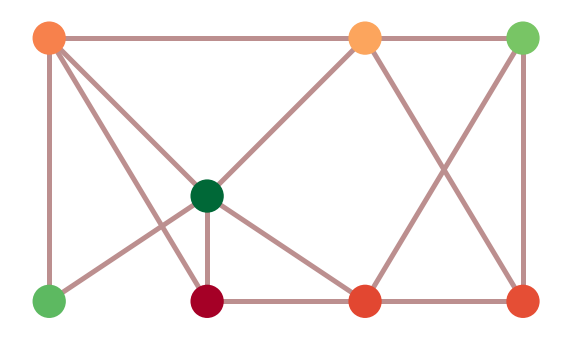

In [28]:
color = network.buses_t.p.squeeze()

fig, ax = plt.subplots(figsize=(12, 6))
data = network.plot(bus_colors=color, bus_cmap=plt.cm.RdYlGn, line_widths = 5.0, bus_sizes = .1)

# busTooltip = mpld3.plugins.PointHTMLTooltip(data[0], busValue,0,0,-50)
lineTooltip = mpld3.plugins.PointHTMLTooltip(data[1], lineValue, 0, 0, -50)
fileName = "network" + str(3) + ".html" 
mpld3.plugins.connect(fig,lineTooltip)
# mpld3.plugins.connect(fig,busTooltip)
mpld3.save_html(fig, fileName)
